In [18]:
# import required libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [20]:
#here we have cleaned data from the prior work of data cleaning and exploration data
df = pd.read_csv('cleaned_data.csv')

In [2]:
###################################PLOTTING FUNCTIONS For User Analytics on Telcom###################################

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def format_float(value):
    return f'{value:,.2f}'

def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]


pd.options.display.float_format = format_float

# Task 3 - Experience Analytics

##### Task 3. 1 - Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable):

1. Average TCP retransmission
2. Average RTT
3. Handset type
4. Average throughput


In [3]:
def null_percentage(df):
    number_of_rows, number_of_columns = df.shape
    df_size = number_of_rows * number_of_columns
    
    null_size = (df.isnull().sum()).sum()
    percentage = round((null_size / df_size) * 100, 2)
    print(f"Data Fraame contain null values of { percentage }%")

In [4]:
'''
TCP DL Retrans. Vol (Bytes)
TCP UL Retrans. Vol (Bytes)

Avg RTT DL (ms)
Avg RTT UL (ms)

Handset type

Avg Bearer TP DL (kbps)
Avg Bearer TP UL (kbps)
'''

df_task_3 = pd.read_csv('Telecom_challenge_dataset.csv')
new_netwok_df = df_task_3[['MSISDN/Number', 'Handset Type','TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',\
                         'Avg RTT DL (ms)', 'Avg RTT UL (ms)',\
                         'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']]


null_percentage(new_netwok_df)
new_netwok_df.isnull().sum()


Data Fraame contain null values of 20.17%


MSISDN/Number                   1066
Handset Type                     572
TCP DL Retrans. Vol (Bytes)    88146
TCP UL Retrans. Vol (Bytes)    96649
Avg RTT DL (ms)                27829
Avg RTT UL (ms)                27812
Avg Bearer TP DL (kbps)            1
Avg Bearer TP UL (kbps)            1
dtype: int64

In [5]:
## Fill Mising Values
for col in new_netwok_df.columns:
    if(new_netwok_df[col].isnull().sum()):
        new_netwok_df[col] = new_netwok_df[col].fillna(new_netwok_df[col].mode()[0])

In [6]:
null_percentage(new_netwok_df)
new_netwok_df.isnull().sum()

Data Fraame contain null values of 0.0%


MSISDN/Number                  0
Handset Type                   0
TCP DL Retrans. Vol (Bytes)    0
TCP UL Retrans. Vol (Bytes)    0
Avg RTT DL (ms)                0
Avg RTT UL (ms)                0
Avg Bearer TP DL (kbps)        0
Avg Bearer TP UL (kbps)        0
dtype: int64

In [7]:
new_netwok_df.shape

(150001, 8)

In [8]:
new_netwok_df['Total TCP Retrans'] = new_netwok_df['TCP DL Retrans. Vol (Bytes)'] +\
    new_netwok_df['TCP UL Retrans. Vol (Bytes)']
new_netwok_df['Total Throughput'] = new_netwok_df['Avg Bearer TP DL (kbps)'] +\
    new_netwok_df['Avg Bearer TP DL (kbps)']

new_netwok_df['Total RTT'] = new_netwok_df['Avg RTT DL (ms)'] + new_netwok_df['Avg RTT UL (ms)']

new_netwok_df.head()

,MSISDN/Number,Handset Type,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Total TCP Retrans,Total Throughput,Total RTT
0,"33,664,962,239.00",Samsung Galaxy A5 Sm-A520F,"1,330.00","1,330.00",42.00,5.00,23.00,44.00,"2,660.00",46.00,47.00
1,"33,681,854,413.00",Samsung Galaxy J5 (Sm-J530),"1,330.00","1,330.00",65.00,5.00,16.00,26.00,"2,660.00",32.00,70.00
2,"33,760,627,129.00",Samsung Galaxy A8 (2018),"1,330.00","1,330.00",28.00,5.00,6.00,9.00,"2,660.00",12.00,33.00
3,"33,750,343,200.00",undefined,"1,330.00","1,330.00",28.00,5.00,44.00,44.00,"2,660.00",88.00,33.00
4,"33,699,795,932.00",Samsung Sm-G390F,"1,330.00","1,330.00",28.00,5.00,6.00,9.00,"2,660.00",12.00,33.00


In [9]:
aggregate = {'Handset Type':'first','Total TCP Retrans':'sum', 'Total Throughput':'sum', 'Total RTT':'sum'}
columns = ['MSISDN/Number','Bearer Id','Handset Type', 'Total TCP Retrans', 'Total Throughput', 'Total RTT']
network_per_user_df = new_netwok_df.groupby('MSISDN/Number').agg(aggregate).reset_index()
network_per_user_df.head(10)

,MSISDN/Number,Handset Type,Total TCP Retrans,Total Throughput,Total RTT
0,"33,601,001,722.00",Huawei P20 Lite Huawei Nova 3E,"2,660.00",74.00,46.00
1,"33,601,001,754.00",Apple iPhone 7 (A1778),"2,660.00",96.00,31.00
2,"33,601,002,511.00",undefined,"2,660.00",96.00,33.00
3,"33,601,007,832.00",Apple iPhone 5S (A1457),"2,396.00",408.00,84.00
4,"33,601,008,617.00",Apple iPhone Se (A1723),"9,373,492.00","80,790.00",119.00
5,"33,601,010,682.00",Samsung Galaxy A8 (2018),"6,750.00","15,044.00",57.00
6,"33,601,011,634.00",Huawei Mate 10 Pro Porsche Design Huawei Mate 10,"112,892.00","81,942.00",53.00
7,"33,601,011,959.00",Samsung Galaxy S8 Plus (Sm-G955F),"1,608.00","1,494.00",52.00
8,"33,601,014,694.00",undefined,"5,320.00",154.00,66.00
9,"33,601,020,306.00",Apple iPhone X (A1865),"2,624.00",150.00,62.00


##### Task 3.2 - Compute & list 10 of the top, bottom and most frequent:

1. TCP values in the dataset. 
2. RTT values in the dataset.
3. Throughput values in the dataset.

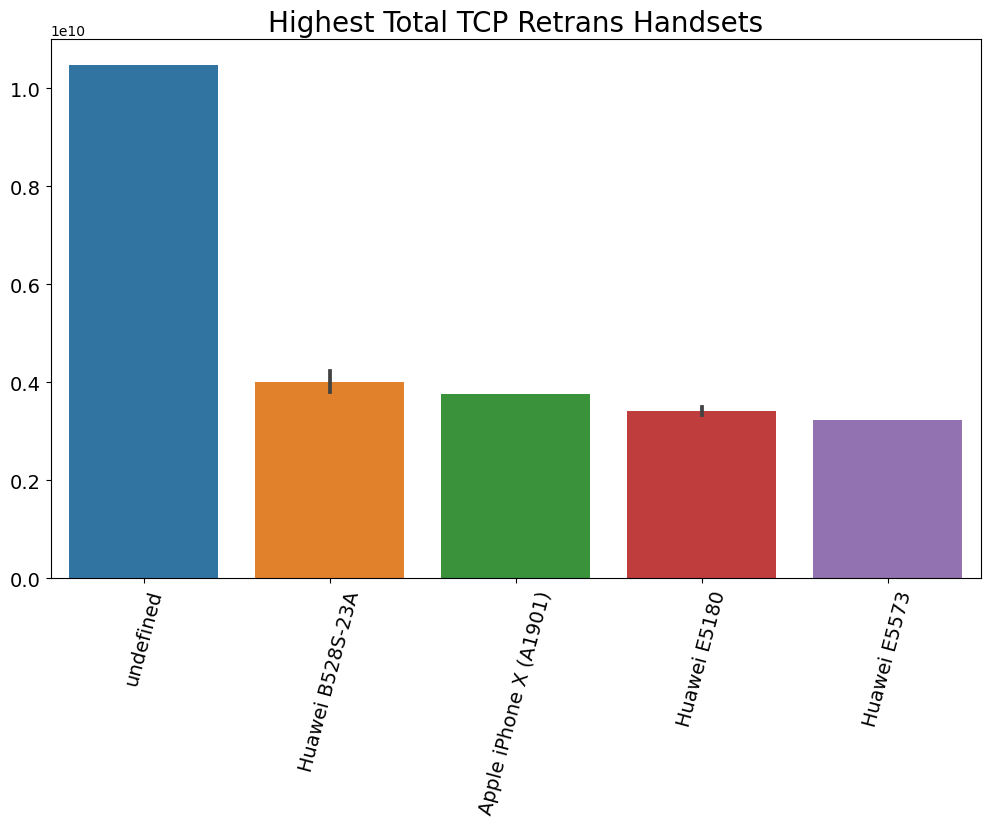

In [10]:
# top 10
#df = network_per_user_df.
result = network_per_user_df.sort_values(by='Total TCP Retrans', ascending=False)[:100]
plot_bar(result, result['Handset Type'], result['Total TCP Retrans'], 'Highest Total TCP Retrans Handsets','','')

In [11]:
# Bottom 5
network_per_user_df.sort_values(by='Total TCP Retrans', ascending=True)[:10]

,MSISDN/Number,Handset Type,Total TCP Retrans,Total Throughput,Total RTT
23472,"33,650,128,412.00",Apple iPhone 5S (A1457),97.00,"60,460.00",48.00
6359,"33,614,777,138.00",Huawei Ascend Mate7,128.00,"16,996.00",64.00
96977,"33,762,062,356.00",Apple iPhone 8 (A1905),129.00,"63,080.00",41.00
13546,"33,626,357,513.00",Apple iPhone 7 (A1778),134.00,"20,256.00",40.00
2177,"33,607,833,304.00",Apple iPhone 5C (A1529),143.00,"32,484.00",32.00
102198,"33,769,636,458.00",Apple iPhone 5S (A1457),176.00,"23,964.00",32.00
25863,"33,650,681,239.00",Xiaomi Communica. Mi Max3,176.00,"13,162.00",52.00
105775,"33,784,203,839.00",Apple iPhone Xr (A2108),177.00,"11,042.00",74.00
78100,"33,679,366,089.00",Samsung Galaxy S6 Plus (Sm-G928),179.00,"67,788.00",39.00
89395,"33,699,694,715.00",Samsung Galaxy Trend Lite 2 (Sm-G318X),182.00,182.00,169.00


In [12]:
# most frequent
network_per_user_df['Total TCP Retrans'].value_counts().head(10)

Total TCP Retrans
2,660.00     47449
5,320.00      7662
7,980.00      1108
2,624.00       363
10,640.00      293
3,990.00       154
2,648.00       136
6,650.00       107
5,284.00       107
13,300.00       93
Name: count, dtype: int64

#### Task 3.3 - Compute & report:

1. The distribution of the average throughput  per handset type and provide interpretation for your findings.
2. The average TCP retransmission view per handset type and provide interpretation for your findings.

In [13]:
handset_throughput = network_per_user_df.groupby('Handset Type').agg({'Total Throughput': 'sum'}).reset_index()
handset_throughput.sort_values(by='Total Throughput', ascending=False).head(5)

## Huawi is leading but apple is follwoing closely

,Handset Type,Total Throughput
316,Huawei B528S-23A,"1,440,008,494.00"
1393,undefined,"195,820,540.00"
59,Apple iPhone 7 (A1778),"135,674,378.00"
53,Apple iPhone 6S (A1688),"130,004,954.00"
49,Apple iPhone 6 (A1586),"118,531,110.00"


In [14]:
handset_rtt = network_per_user_df.groupby('Handset Type').agg({'Total RTT': 'sum'}).reset_index()
handset_rtt.sort_values(by='Total RTT', ascending=False).head(5)


,Handset Type,Total RTT
316,Huawei B528S-23A,"2,995,417.00"
1393,undefined,"999,155.00"
49,Apple iPhone 6 (A1586),"913,046.00"
53,Apple iPhone 6S (A1688),"730,817.00"
59,Apple iPhone 7 (A1778),"703,139.00"


#### Task 3.4 - Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster

In [15]:
handset= network_per_user_df['Handset Type'].unique()
net_cluster_df = network_per_user_df.copy()
net_cluster_df.drop('Handset Type', axis=1, inplace=True)
net_cluster_df = net_cluster_df.set_index('MSISDN/Number')

net_cluster_df.head()

,Total TCP Retrans,Total Throughput,Total RTT
MSISDN/Number,,,
"33,601,001,722.00","2,660.00",74.00,46.00
"33,601,001,754.00","2,660.00",96.00,31.00
"33,601,002,511.00","2,660.00",96.00,33.00
"33,601,007,832.00","2,396.00",408.00,84.00
"33,601,008,617.00","9,373,492.00","80,790.00",119.00


In [22]:
# Make dataframe for normalized
df2 = df.copy()
df2['Total'] = df2['Total UL (Bytes)'] + df2['Total DL (Bytes)']
df2 = df2.groupby('MSISDN/Number')\
    .agg({"Bearer Id": "count", 'Dur. (ms).1':'sum', 'Total':'sum'})

df2.head()

,Bearer Id,Dur. (ms).1,Total
MSISDN/Number,,,
"33,601,001,722.00",1,"116,720,140.00","878,690,574.00"
"33,601,001,754.00",1,"181,230,963.00","156,859,643.00"
"33,601,002,511.00",1,"134,969,374.00","595,966,483.00"
"33,601,007,832.00",1,"49,878,024.00","422,320,698.00"
"33,601,008,617.00",2,"37,104,453.00","1,457,410,944.00"


In [24]:
## First normalize the Data, Then Cluster
min_max_scaler = preprocessing.MinMaxScaler()
network_values = net_cluster_df.values

scalled_values = min_max_scaler.fit_transform(network_values)
df_network_normalized = pd.DataFrame(data=scalled_values, columns=df2.columns)


kmeans = KMeans(n_clusters=3).fit(df_network_normalized)

In [25]:
cluster = kmeans.predict(df_network_normalized)
experiance_df = network_per_user_df.copy()
experiance_df['cluster-experiance']  = cluster
experiance_df = experiance_df.set_index('MSISDN/Number')
experiance_df.head()

,Handset Type,Total TCP Retrans,Total Throughput,Total RTT,cluster-experiance
MSISDN/Number,,,,,
"33,601,001,722.00",Huawei P20 Lite Huawei Nova 3E,"2,660.00",74.00,46.00,0
"33,601,001,754.00",Apple iPhone 7 (A1778),"2,660.00",96.00,31.00,0
"33,601,002,511.00",undefined,"2,660.00",96.00,33.00,0
"33,601,007,832.00",Apple iPhone 5S (A1457),"2,396.00",408.00,84.00,0
"33,601,008,617.00",Apple iPhone Se (A1723),"9,373,492.00","80,790.00",119.00,0


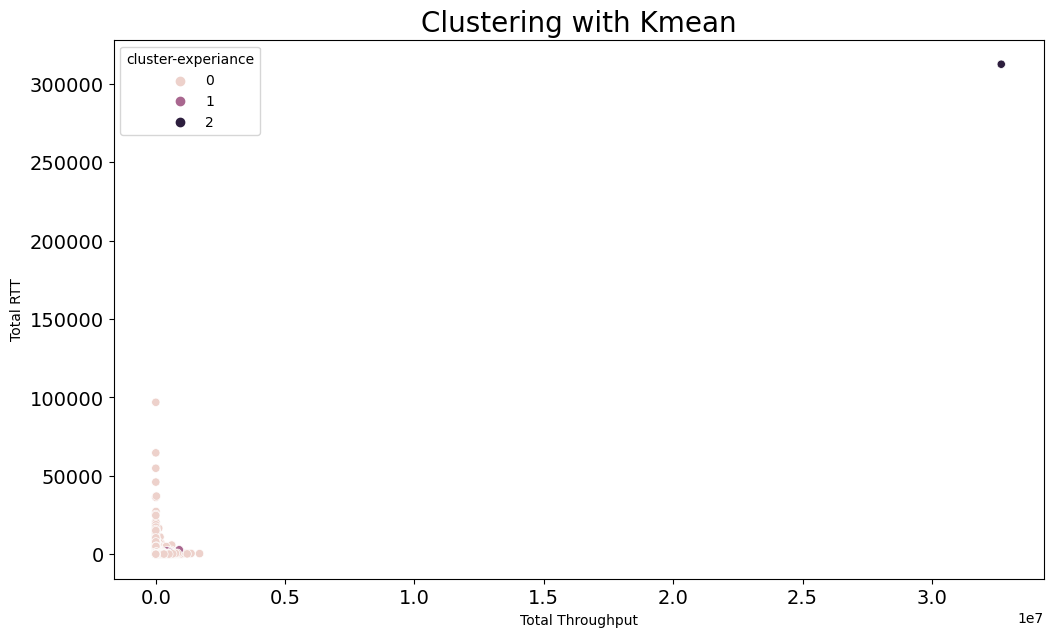

In [26]:
plot_scatter(experiance_df,"Total Throughput", "Total RTT","Clustering with Kmean", "cluster-experiance", "")

In [27]:
experiance_df['cluster-experiance'].value_counts()


cluster-experiance
0    106622
1       233
2         1
Name: count, dtype: int64